<a href="https://colab.research.google.com/github/LGG722/Lucia-1956237/blob/main/PIA/Final_Project_Team_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team 6**

Ana Luisa Garza Diaz      1948335
Lucia Garza Garza         1956237
Carolina Franco Ramirez   1902496

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from PIL import Image
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls

archive.zip  sample_data


In [ ]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 95% 113M/119M [00:01<00:00, 132MB/s] 
100% 119M/119M [00:01<00:00, 118MB/s]


In [ ]:
!unzip -o "archive.zip"

Archive:  archive.zip
  inflating: Data/test/adenocarcinoma/000108 (3).png  
  inflating: Data/test/adenocarcinoma/000109 (2).png  
  inflating: Data/test/adenocarcinoma/000109 (4).png  
  inflating: Data/test/adenocarcinoma/000109 (5).png  
  inflating: Data/test/adenocarcinoma/000112 (2).png  
  inflating: Data/test/adenocarcinoma/000113 (7).png  
  inflating: Data/test/adenocarcinoma/000114 (5).png  
  inflating: Data/test/adenocarcinoma/000114.png  
  inflating: Data/test/adenocarcinoma/000115 (4).png  
  inflating: Data/test/adenocarcinoma/000115 (8).png  
  inflating: Data/test/adenocarcinoma/000115.png  
  inflating: Data/test/adenocarcinoma/000116 (5).png  
  inflating: Data/test/adenocarcinoma/000116 (7).png  
  inflating: Data/test/adenocarcinoma/000116 (9).png  
  inflating: Data/test/adenocarcinoma/000117 (4).png  
  inflating: Data/test/adenocarcinoma/000117 (8).png  
  inflating: Data/test/adenocarcinoma/000117.png  
  inflating: Data/test/adenocarcinoma/000118 (5).png  


Images before preprocessing:


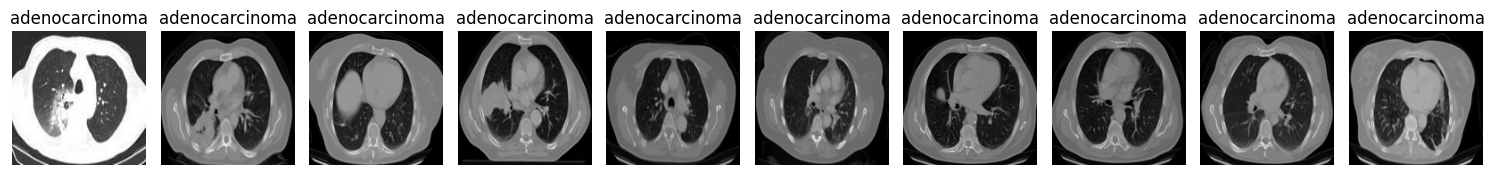

Images after preprocessing:


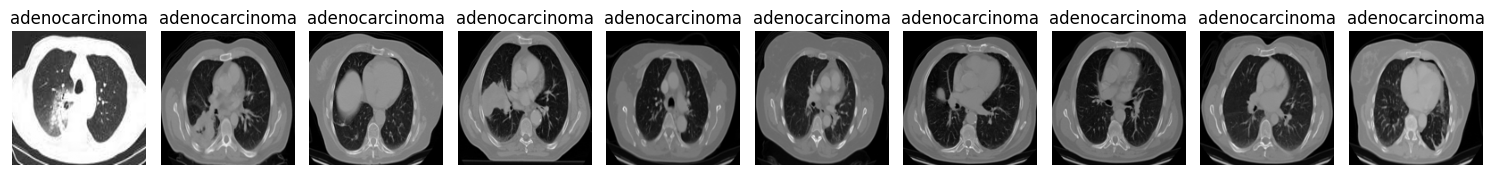

In [24]:
# Directorios de las categorías (se mantiene igual)
folder_paths = {
    'adenocarcinoma': 'Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
    'large_cell_carcinoma': 'Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
    'normal': 'Data/train/normal',
    'squamous_cell_carcinoma': 'Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
}

# Función para visualizar imágenes
def show_images(images, labels, rows=1, figsize=(15, 5), preprocessing=None):
    """ Muestra imágenes con o sin preprocesamiento aplicado. """
    fig, axes = plt.subplots(rows, len(images) // rows, figsize=figsize)
    axes = axes.flatten()
    for img, ax, label in zip(images, axes, labels):
        if preprocessing:
            img = preprocessing(img)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)
    plt.tight_layout()
    plt.show()

# Cargar y etiquetar imágenes
images = []
labels = []
class_names = ['adenocarcinoma', 'large_cell_carcinoma', 'normal', 'squamous_cell_carcinoma']

for label, folder_path in folder_paths.items():
    image_files = glob.glob(folder_path + '/*.png')
    for image_file in image_files:
        image = Image.open(image_file)
        image = image.convert('RGB')  # Convierte la imagen a RGB si es necesario
        image = image.resize((150, 150))  # Redimensiona la imagen
        images.append(np.array(image))
        labels.append(class_names.index(label))

# Seleccionar algunas imágenes para mostrar antes del preprocesamiento
sample_images = [images[i] for i in range(10)]
sample_labels = [class_names[labels[i]] for i in range(10)]

# Mostrar imágenes antes del preprocesamiento
print("Images before preprocessing:")
show_images(sample_images, sample_labels, rows=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convertir a arrays de numpy y normalizar
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Definir función de preprocesamiento para normalización
def preprocess_image(image):
    image = np.array(image)
    return image / 255.0  # Normalizar

# Mostrar imágenes después del preprocesamiento
print("Images after preprocessing:")
show_images(sample_images, sample_labels, rows=1, preprocessing=preprocess_image)

In [29]:
# Construir el modelo de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
15/15 [==============================] - 14s 926ms/step - loss: 1.3912 - accuracy: 0.3354 - val_loss: 1.1252 - val_accuracy: 0.5785
Epoch 2/10
15/15 [==============================] - 14s 907ms/step - loss: 0.9423 - accuracy: 0.6083 - val_loss: 0.8347 - val_accuracy: 0.6446
Epoch 3/10
15/15 [==============================] - 14s 942ms/step - loss: 0.7452 - accuracy: 0.7000 - val_loss: 0.6479 - val_accuracy: 0.7190
Epoch 4/10
15/15 [==============================] - 13s 881ms/step - loss: 0.5956 - accuracy: 0.7688 - val_loss: 0.7408 - val_accuracy: 0.6694
Epoch 5/10
15/15 [==============================] - 13s 888ms/step - loss: 0.4703 - accuracy: 0.8208 - val_loss: 0.4838 - val_accuracy: 0.8264
Epoch 6/10
15/15 [==============================] - 13s 898ms/step - loss: 0.2718 - accuracy: 0.8917 - val_loss: 0.4024 - val_accuracy: 0.8512
Epoch 7/10
15/15 [==============================] - 13s 906ms/step - loss: 0.1837 - accuracy: 0.9417 - val_loss: 0.4606 - val_accuracy: 0.8430

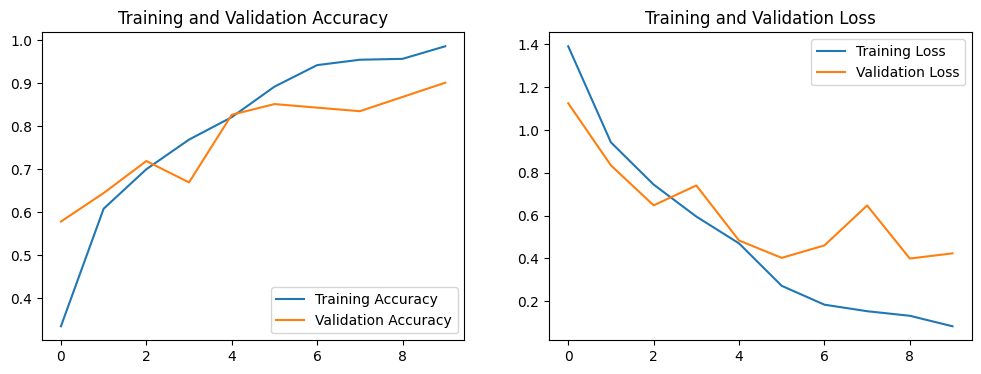

In [30]:
# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

4/4 [==============================] - 1s 230ms/step


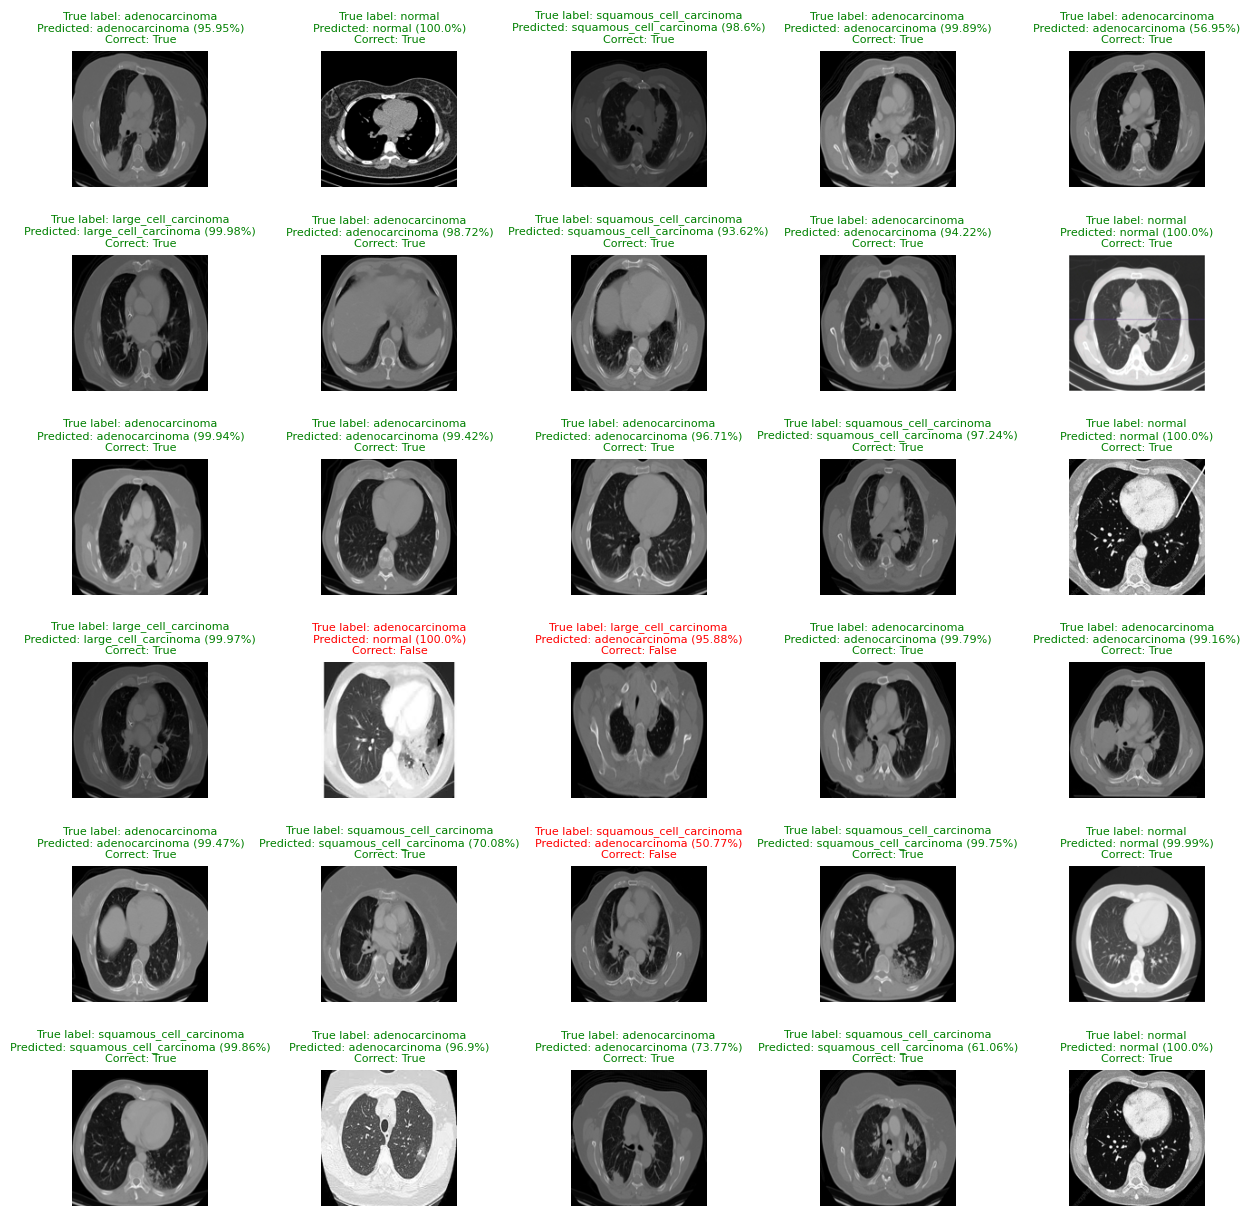

Porcentaje de éxito global: 90.00%


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def show_predictions(test_images, test_labels, predictions, num_images=30):
    class_names = ['adenocarcinoma', 'large_cell_carcinoma', 'normal', 'squamous_cell_carcinoma']
    correct_count = 0

    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        ax = plt.subplot(6, 5, i + 1)  # Ajusta las dimensiones para acomodar 30 imágenes
        ax.imshow(test_images[i])
        real_label = class_names[test_labels[i]]
        predicted_label = class_names[np.argmax(predictions[i])]
        is_correct = real_label == predicted_label
        if is_correct:
            correct_count += 1
        percentage = round(np.max(predictions[i]) * 100, 2)

        ax.set_title(f'True label: {real_label}\nPredicted: {predicted_label} ({percentage}%)\nCorrect: {"True" if is_correct else "False"}', color='green' if is_correct else 'red', fontsize=8)
        ax.axis('off')

    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

    return correct_count

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_images)

# Mostrar predicciones y obtener el conteo de aciertos
correct_count = show_predictions(test_images, test_labels, predictions, num_images=30)

# Calcular y mostrar el porcentaje de éxito global
total_images = 30
success_percentage = (correct_count / total_images) * 100
print(f"Porcentaje de éxito global: {success_percentage:.2f}%")
